In [1]:
import pandas as pd
import numpy as np

In [2]:
data_wig20 = pd.read_csv("../../data/wig20_2005.csv")
data_peo = pd.read_csv("../../data/peo_2005.csv")

In [3]:
data_peo['Zwrot'] = data_peo['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [4]:
data_wig20['Data'] = pd.to_datetime(data_wig20['Data'])
data_peo['Data'] = pd.to_datetime(data_peo['Data'])

In [5]:
data_wig20.set_index('Data', inplace=True)
data_peo.set_index('Data', inplace=True)

In [6]:
window_length = 7

In [7]:
rolling_betas = [np.nan] * window_length 

In [8]:
for end_index in range(window_length, len(data_peo)):
    window_data_peo = data_peo.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_peo['Zwrot'].mean()

    sum_numerator = ((window_data_peo['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [9]:
rolling_betas

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.4087972266404523,
 1.4286664294415423,
 1.3754345335495204,
 0.9701736381630603,
 0.5896056784722279,
 1.17876981990132,
 1.068857738044408,
 1.0627397797842026,
 1.0298986840892574,
 0.9894084046268402,
 0.9857739165328424,
 0.8348156839290967,
 0.5191019385264788,
 0.8356992989068429,
 1.568648216811714,
 1.5476309760793465,
 1.5169171892923543,
 1.532501542042752,
 1.3805232690819318,
 1.3251864132143316,
 1.5010223779316683,
 1.5981281529478581,
 1.7514864904251866,
 1.9234501756579832,
 1.9063106233903844,
 2.260212466449023,
 1.585271930734057,
 1.7055788204233078,
 1.747231982253917,
 1.814429475729711,
 1.79980266438466,
 1.8378723993310315,
 1.8499532988305536,
 2.2455805728770013,
 1.853677801353835,
 1.819617300209422,
 1.118806525305579,
 1.101427309066885,
 1.0550857636688815,
 1.0499655139283774,
 0.8757036588526486,
 0.6033300348540107,
 0.5807337766397758,
 0.8600132184950939,
 0.6148322777312477,
 0.4874845698048228,
 0.3782

In [10]:
rolling_betas = rolling_betas[:len(data_peo)]

In [11]:
data_peo['Beta'] = rolling_betas

In [12]:
data_peo.head(10)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Zwrot,Beta
Data,,,,,,,
2005-01-03,56.8084,58.8612,56.8084,58.2476,376792.311012,NaN,NaN
2005-01-04,57.4235,58.0435,57.2176,57.8319,159300.776621,-0.007137,NaN
2005-01-05,57.2176,57.6333,55.7800,55.7800,429800.893829,-0.035480,NaN
2005-01-06,55.5742,56.8084,55.1601,55.1601,377216.003060,-0.011113,NaN
2005-01-07,55.1601,56.1893,54.9551,55.1601,273211.994084,0.000000,NaN
2005-01-10,54.7494,55.7800,54.7494,55.3692,396838.395862,0.003791,NaN
2005-01-11,55.3692,56.1893,54.5442,54.7494,327537.491072,-0.011194,NaN
2005-01-12,54.7494,55.9843,54.5442,55.1601,78326.040946,0.007501,1.408797
2005-01-13,55.9843,56.1893,54.9551,55.1601,324964.367146,0.000000,1.428666


In [13]:
data_peo.to_csv("../../data/peo_2005_beta.csv", index=True)

In [14]:
start_date = data_peo.index[7]

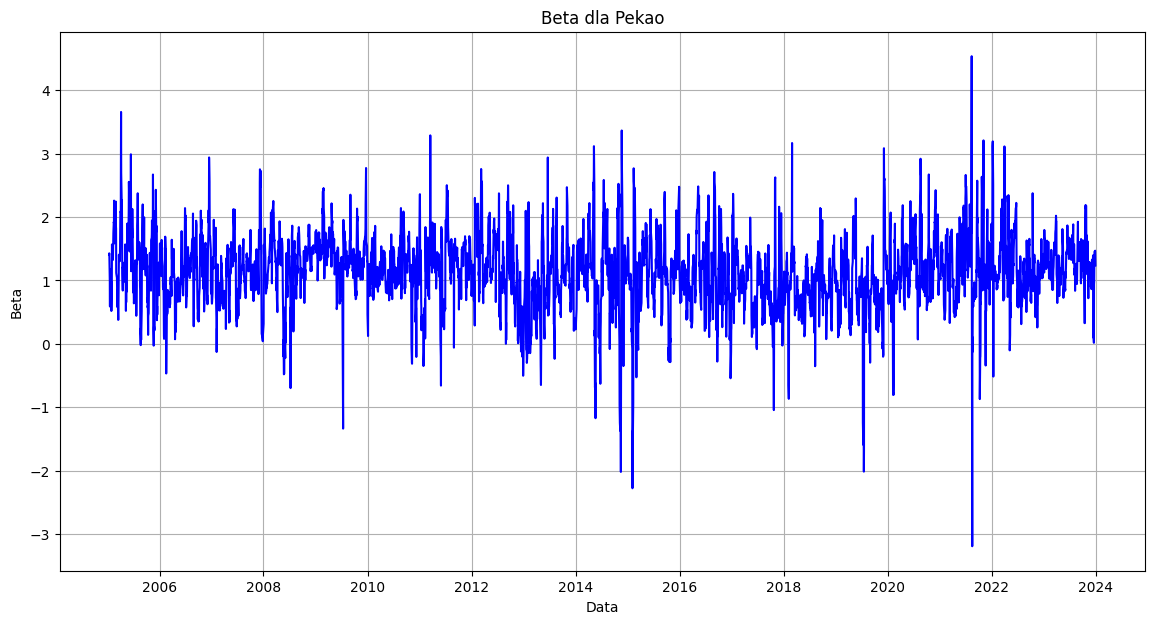

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla Pekao')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

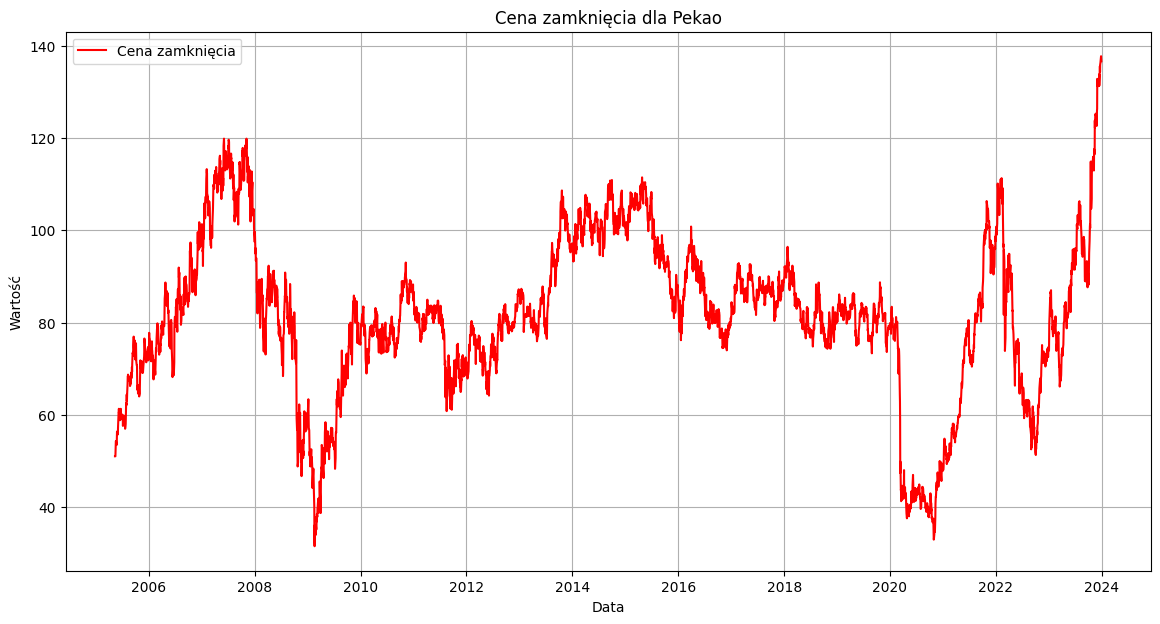

In [16]:
start_date = data_peo.index[90]

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla Pekao')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

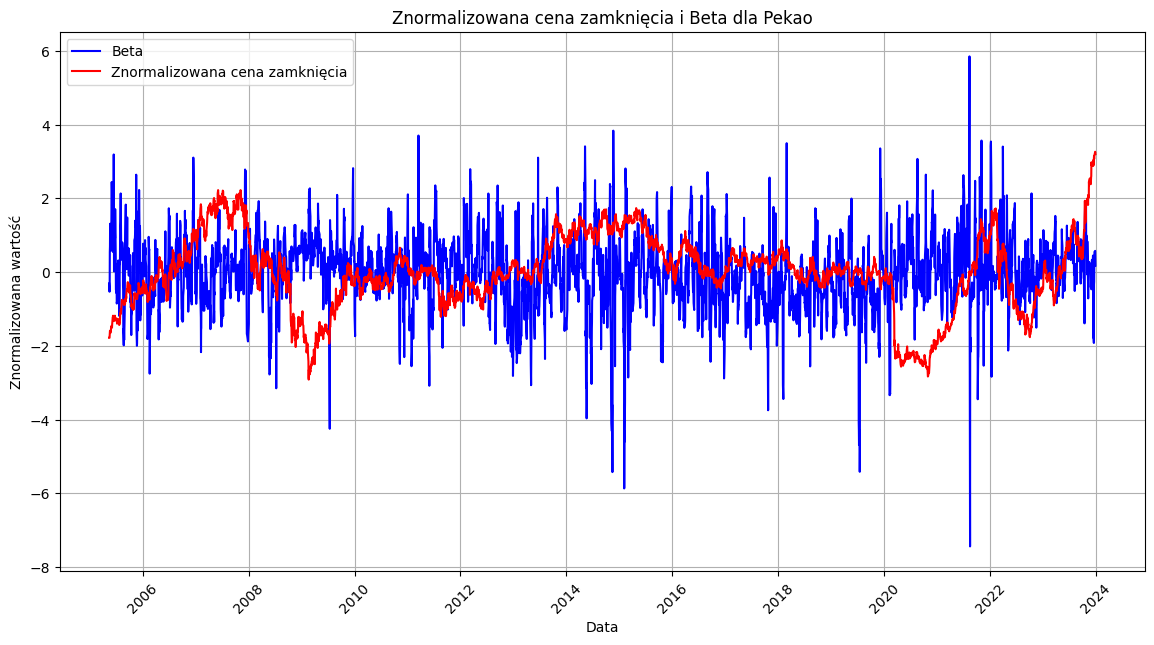

In [17]:
start_date = data_peo.index[90]

normalized_rolling_beta = (data_peo.loc[start_date:]['Beta'] - data_peo.loc[start_date:]['Beta'].mean()) / data_peo.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_peo.loc[start_date:]['Zamkniecie'] - data_peo.loc[start_date:]['Zamkniecie'].mean()) / data_peo.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_peo.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla Pekao')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()